In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from utils import *
import os

1
         Unnamed: 0       time            y
55613         55613    55613.0  2930.583750
55614         55614    55614.0  2989.916965
55615         55615    55615.0  2997.785644
55616         55616    55616.0  3049.248929
55617         55617    55617.0  3068.349111
...             ...        ...          ...
1520201     1520201  1520201.0  1927.663227
1520202     1520202  1520202.0  1927.664484
1520203     1520203  1520203.0  1927.665741
1520204     1520204  1520204.0  1927.666997
1520205     1520205  1520205.0  1927.668254

[429993 rows x 3 columns]
         Unnamed: 0       time            y
0                 0        0.0  3000.112732
1                 1        1.0  3000.124214
2                 2        2.0  3000.135696
3                 3        3.0  3000.147178
4                 4        4.0  3000.158660
...             ...        ...          ...
1576795     1576795  1576795.0          NaN
1576796     1576796  1576796.0          NaN
1576797     1576797  1576797.0          NaN
157

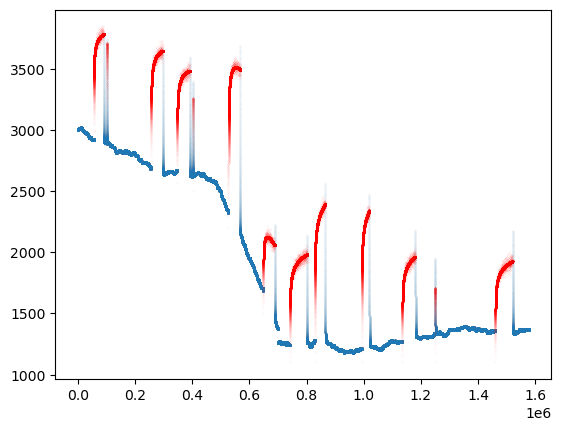

In [2]:
def red_blue_intervals(ts,intervals):
    blue = []
    red = []
    blue.append(ts.iloc[0:intervals['start'][0]])
    print(len(blue))
    for i in range(len(intervals)-1):
        blue.append(ts.iloc[intervals['stop'][i]:intervals['start'][i+1]])
    blue.append(ts.iloc[intervals['stop'][len(intervals)-1]:len(ts)])
    
    for i in range(len(intervals)):
        red.append(ts.iloc[intervals['start'][i]:intervals['stop'][i]])
    blue = pd.concat(blue, ignore_index=False)
    red = pd.concat(red, ignore_index=False)
    return red, blue
data = pd.read_csv("data/train/example1.csv",sep="\t")
label = pd.read_csv("data/train/example1_intervals.csv")
r,b = red_blue_intervals(data,label)
print(r)
print(b)
print(type(b))
print(b)
plt.scatter(b.index,b['y'], s=0.001)
plt.scatter(r.index,r['y'],c='r', s=0.001)

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import gc
# Get the list of all files and directories
path = "spot-the-trend-train-data"
dir_list = os.listdir(path)
#print("Files and directories in '", path, "' :")
# prints all files
#print(dir_list)
#print(type(dir_list[0]))
#print(len(dir_list))
train_dir = []
for file in dir_list:
    if not file.__contains__('intervals'):
        train_dir.append(file)
#print(dir_list)
#print(len(dir_list))
#print(train_dir)
#print(len(train_dir))


intervals = []
for file in train_dir:
    interval = file.replace('.csv','_intervals.csv')
    try:
        label = pd.read_csv("spot-the-trend-train-data/" + interval)
    #label = list(zip(label.start,label.stop))
        data = pd.read_csv("spot-the-trend-train-data/" + file ,sep="\t")
    #example1 = example1[['time','y']]
        r,b = red_blue_intervals(data,label)
        plt.scatter(b.index,b['y'], s=0.001)
        plt.scatter(r.index,r['y'],c='r', s=0.001)
        plt.title(file)
        plt.savefig("visualisations/"+file.replace('.csv','')+'.png', bbox_inches='tight')
        plt.close('all')
        gc.collect()
    except: 
        print(file)    
    #plot_well(label,example1,title="Data and label",s=0.001)
    

Files and directories in ' spot-the-trend-train-data ' :
['uopfk.csv', 'mlhdp.csv', 'ogfyy.csv', 'pltbp.csv', 'mubzc.csv', 'rlipv.csv', 'nlbul_intervals.csv', 'rhqha.csv', 'zerdn.csv', 'kjfic.csv', 'ohxto_intervals.csv', 'ltojn_intervals.csv', 'wdztf_intervals.csv', 'ksuou.csv', 'quhlp.csv', 'qgyxz_intervals.csv', 'quhyf.csv', 'qjaqb_intervals.csv', 'vnoff.csv', 'qkjbp_intervals.csv', 'pilpo.csv', 'cswlh.csv', 'swxob.csv', 'yifix_intervals.csv', 'pzkms_intervals.csv', 'sjwkh.csv', 'okmfd.csv', 'zrhip.csv', 'wtlug.csv', 'qyftj_intervals.csv', 'qpube.csv', 'gdzwv_intervals.csv', 'obwaz.csv', 'pnrlm.csv', 'pnrlm_intervals.csv', 'example2_intervals.csv', 'rnfza_intervals.csv', 'pcokt_intervals.csv', 'ovpmx_intervals.csv', 'ntres.csv', 'oerfw.csv', 'pzrlj_intervals.csv', 'njcuu.csv', 'qaxgm.csv', 'uopfk_intervals.csv', 'nbpmj_intervals.csv', 'eppxh_intervals.csv', 'otjak.csv', 'rlipv_intervals.csv', 'dsoir_intervals.csv', 'otheq_intervals.csv', 'pcokt.csv', 'jijcc.csv', 'owjey.csv', 'mvbdu_

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 160303: invalid start byte